# Predicting heart disease using machine learning

This notebook aims to explore and build a classification model for predicting heart disease based on the information available.

## 1. Imports

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics

In [8]:
sns.set_theme(style="whitegrid")

## 2. Data

### 2.1 About the data

The data came from Kaggle. https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

#### 2.1.1 Data dictionary

1. age: age in years
2. sex: sex (1 = male; 0 = female)
3. cp: chest pain type
    * 0: typical angina
    * 1: atypical angina
    * 2: non-anginal pain
    * 3: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
    * 0: normal
    * 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or - depression of > 0.05 mV)
    * 2: showing probable or definite left ventricular hypertrophy by Estes' - criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
    * 0: upsloping
    * 1: flat
    * 2: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### 2.2 Exploratory Data Analysis (EDA)

In [9]:
pd.options.display.float_format = '{:.2f}'.format
df = pd.read_csv(
    'heart-disease.csv',
    )
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60,2,0,2,1


In [10]:
df.shape

(303, 14)

In [11]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


##### Are there any missing values?

In [13]:
print('Quantity of missing values:', df.isna().sum().sum())

Quantity of missing values: 0


##### Visualizing the target column

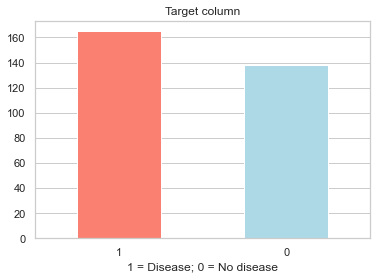

In [14]:
df['target'].value_counts().plot(kind='bar', color=['salmon', 'lightblue'], rot=0, grid=False)
plt.grid(axis='y')
plt.title('Target column')
plt.xlabel('1 = Disease; 0 = No disease');

In [15]:
counts = df['target'].value_counts(normalize=True) * 100
print(f"% of people with heart disease: {counts[1]:.2f}%")
print(f"% of people without heart disease: {counts[0]:.2f}%")

% of people with heart disease: 54.46%
% of people without heart disease: 45.54%


#### Heart Disease frequency according to sex

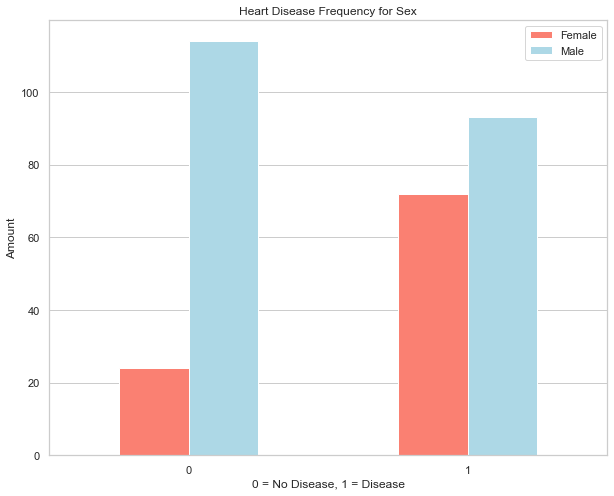

In [16]:
pd.crosstab(df['target'], df['sex']).plot(kind='bar', figsize=(10,8), color=['salmon', 'lightblue'])
plt.grid(axis='x')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

#### Age vs Max Heart Rate for Heart Disease

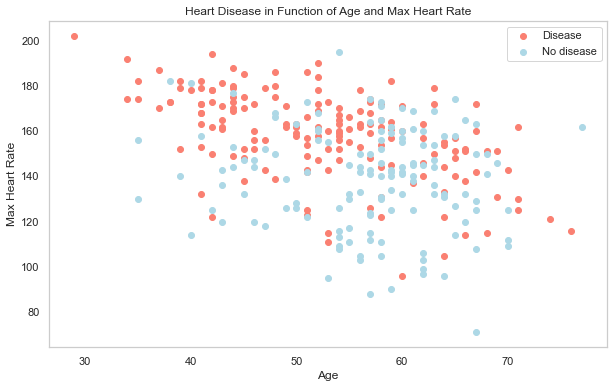

In [17]:
plt.figure(figsize=(10,6))

plt.scatter(
    df['age'][df['target'] == 1],
    df['thalach'][df['target'] == 1],
    color='salmon'
)

plt.scatter(
    df['age'][df['target'] == 0],
    df['thalach'][df['target'] == 0],
    color='lightblue'
)

plt.grid(False)
plt.title('Heart Disease in Function of Age and Max Heart Rate')
plt.legend(['Disease', 'No disease'])
plt.xlabel('Age')
plt.ylabel('Max Heart Rate');

#### Heart Disease Frequency per Chest Pain Type

3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease

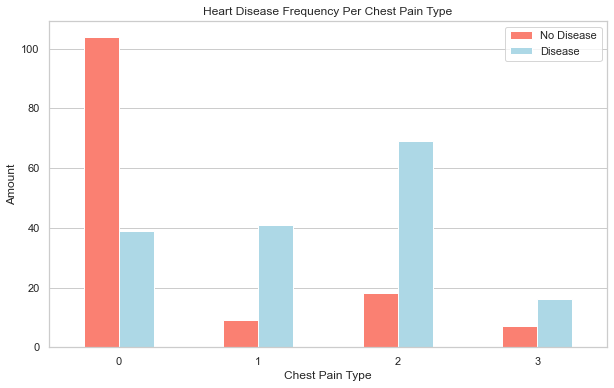

In [18]:
pd.crosstab(df['cp'], df['target']).plot(kind='bar', figsize=(10,6), color=['salmon', 'lightblue'])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)
plt.grid(axis='x')

#### Distributions

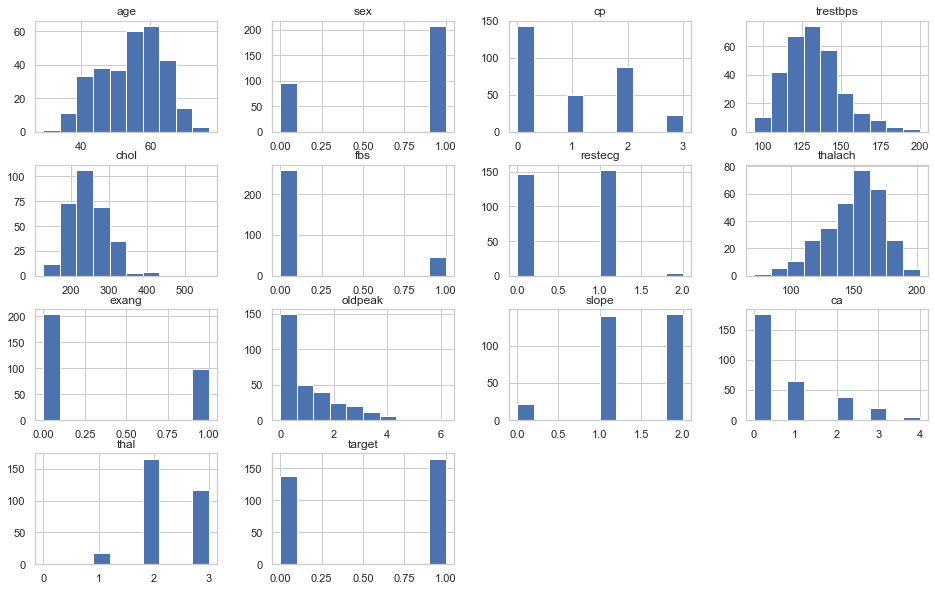

In [19]:
df.hist(figsize=(16,10));

#### Relatioship between variables

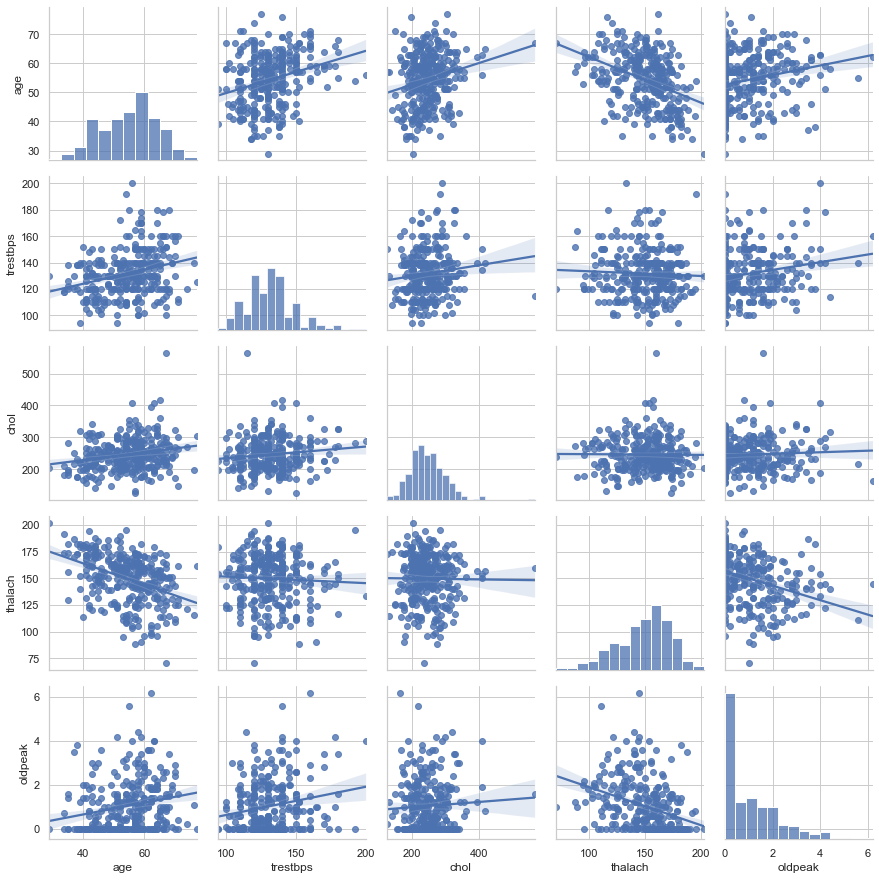

In [20]:
g = sns.PairGrid(df.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal', 'target'], axis=1))
g.map_diag(sns.histplot)
g.map_offdiag(sns.regplot);

<AxesSubplot:>

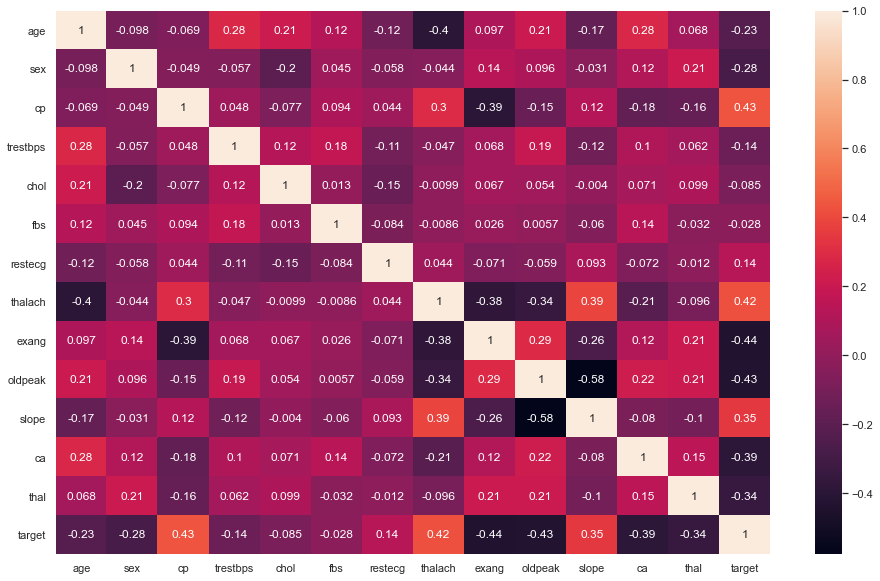

In [21]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True)

In [22]:
df_numerical = df.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal', 'target'], axis=1)

#### Boxplots

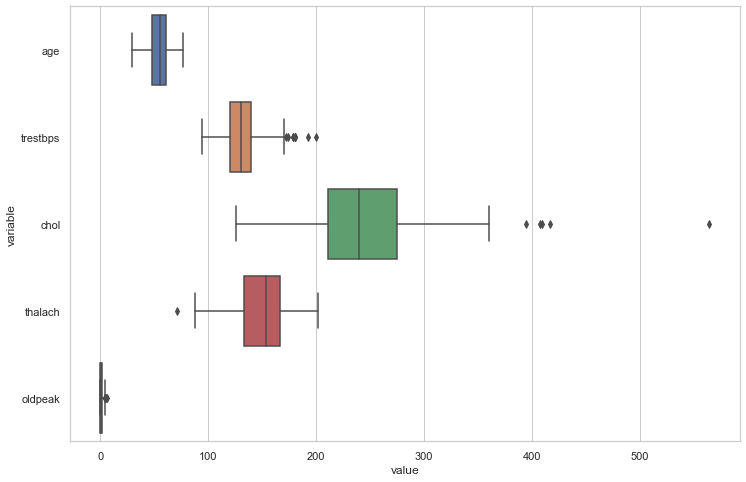

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df_numerical.melt()['value'], y=df_numerical.melt()['variable']);

## 3. Modelling

### 3.1 Creating the training and testing sets

In [24]:
x = df.drop('target', axis=1)
y = df['target']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Normalizing the training and test data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### 3.2 Trying different classification models

In [26]:
np.random.seed(42)
models = {
    'Logistic Regression': LogisticRegression(),
    'KNeighbors': KNeighborsClassifier(),
    'SGDClassifier': SGDClassifier(),
    'Random Forest': RandomForestClassifier(),
    'LinearSVC': LinearSVC()
}

def fit_and_score(model, x_train, x_test, y_train, y_test):
    np.random.seed(42)

    data = []
    
    for name, model in models.items():
        model.fit(x_train, y_train)
        y_preds = model.predict(x_test)

        f1_score = np.mean(cross_val_score(model, x, y, cv=5, scoring='f1_macro')).round(2)
        precision = np.mean(cross_val_score(model, x, y, cv=5, scoring='precision')).round(2)
        recall = np.mean(cross_val_score(model, x, y, cv=5, scoring='recall')).round(2)
        accuracy = np.mean(cross_val_score(model, x, y, cv=5, scoring='accuracy')).round(2)

        data.append((name, accuracy, precision, recall, f1_score))
    return pd.DataFrame(data, columns=['model', 'accuracy_score', 'precision', 'recall', 'f1_score'])

In [54]:
import warnings
warnings.filterwarnings('ignore')

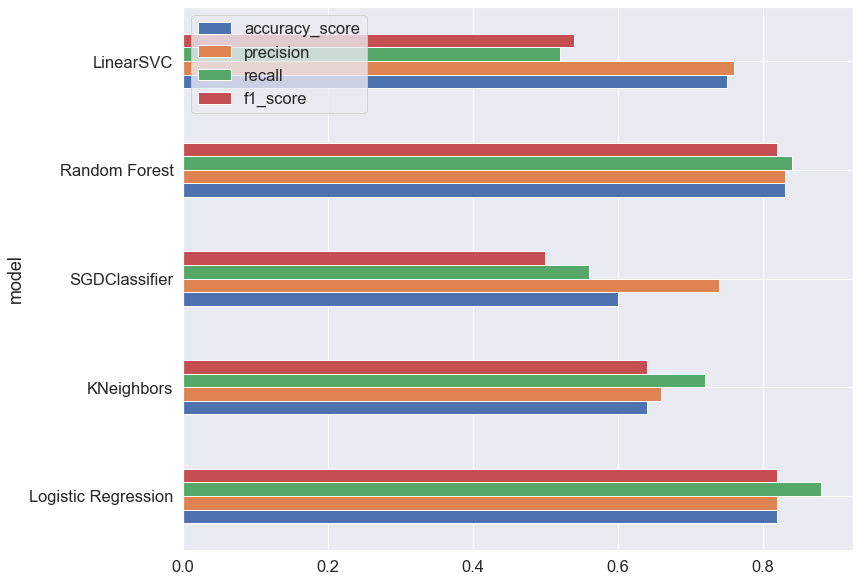

In [55]:
model_comparison = fit_and_score(models, x_train, x_test, y_train, y_test)
model_comparison.set_index('model').plot(kind='barh', figsize=(12,10)).legend(loc=2);


In [28]:
model_comparison

,model,accuracy_score,precision,recall,f1_score
0,Logistic Regression,0.82,0.82,0.88,0.82
1,KNeighbors,0.64,0.66,0.72,0.64
2,SGDClassifier,0.60,0.74,0.56,0.50
3,Random Forest,0.83,0.83,0.84,0.82
4,LinearSVC,0.75,0.76,0.52,0.54


Based on the baseline results, I'll tune the Random Forest and Logistic Regression models.

### 3.4 Tuning

In [29]:
# Parameters grid for LogisticRegression
log_grid = {'C': np.logspace(-4, 4, 30),
            'solver': ['liblinear']}

# Parameters grid for RandomForestClassifier
rf_grid = {'n_estimators': range(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

#### 3.4.1 Hyperparameter tuning for LogisticRegression

In [30]:
# GridSearch for LogisticRegression
np.random.seed(42)

gs_log = GridSearchCV(
    LogisticRegression(),
    param_grid=log_grid,
    cv=5,
    verbose=True
)

gs_log.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [31]:
gs_log.best_params_

{'C': 2.592943797404667, 'solver': 'liblinear'}

In [32]:
gs_log_y_preds = gs_log.predict(x_test)

##### Evaluation

In [33]:
print(metrics.classification_report(y_test, gs_log_y_preds))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.84      0.88      0.86        41

    accuracy                           0.84        76
   macro avg       0.84      0.84      0.84        76
weighted avg       0.84      0.84      0.84        76



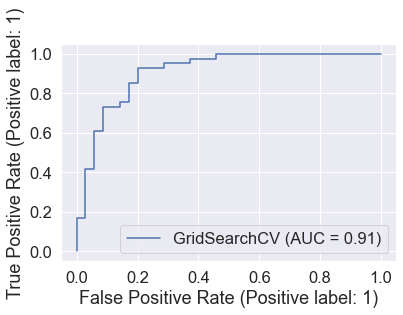

In [57]:
metrics.plot_roc_curve(gs_log, x_test, y_test);

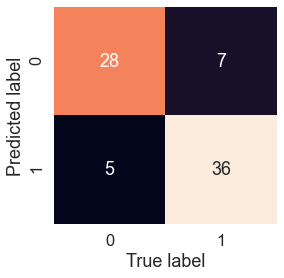

In [35]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(
    metrics.confusion_matrix(y_test, gs_log_y_preds),
    annot=True,
    cbar=False,)
plt.xlabel('True label')
plt.ylabel('Predicted label');

#### 3.4.2 Hyperparameter tuning for RandomForest

In [36]:
# RandomizedSearch for RandomForest
np.random.seed(42)

rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    verbose=True,
    n_iter=30
)

rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=30,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': range(10, 1000, 50)},
                   verbose=True)

In [37]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [38]:
rs_rf_y_preds = rs_rf.predict(x_test)

##### Evaluation

In [39]:
print(metrics.classification_report(y_test, rs_rf_y_preds))

              precision    recall  f1-score   support

           0       0.90      0.77      0.83        35
           1       0.83      0.93      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



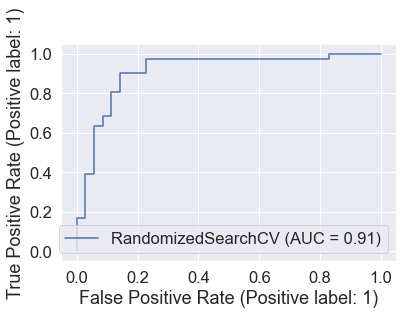

In [59]:
metrics.plot_roc_curve(rs_rf, x_test, y_test);

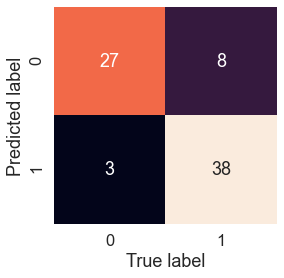

In [41]:
sns.set(font_scale=1.5)
fig, ax = plt.subplots(figsize=(4,4))
ax = sns.heatmap(
    metrics.confusion_matrix(y_test, rs_rf_y_preds),
    annot=True,
    cbar=False,)
plt.xlabel('True label')
plt.ylabel('Predicted label');

Although not by much, the RandomForest model show the best results.

## 4. Calculating evaluation metrics using cross-validation

In [42]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 18,
 'min_samples_leaf': 19,
 'max_depth': 5}

In [43]:
clf = RandomForestClassifier(
    n_estimators=510,
    min_samples_leaf=19,
    min_samples_split=18,
    max_depth=5
)

In [44]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=19, min_samples_split=18,
                       n_estimators=510)

In [45]:
np.random.seed(42)
# Cross-validated accuracy
cv_acc = np.mean(cross_val_score(clf, x, y, cv=5, scoring='accuracy'))

# Cross-validated precision
cv_precision = np.mean(cross_val_score(clf, x, y, cv=5, scoring='precision'))

# Cross-validated recall
cv_recall = np.mean(cross_val_score(clf, x, y, cv=5, scoring='recall'))

# Cross-validated f1-score
cv_f1_score = np.mean(cross_val_score(clf, x, y, cv=5, scoring='f1'))


In [46]:
print(
    f"""Cross-validated classification metrics:
    Accuracy: {cv_acc * 100:.2f}%
    Precision: {cv_precision * 100:.2f}%
    Recall: {cv_recall * 100:.2f}%
    F1 score: {cv_f1_score * 100:.2f}%""")

Cross-validated classification metrics:
    Accuracy: 84.81%
    Precision: 82.26%
    Recall: 89.70%
    F1 score: 85.29%


### Feature importance

In [47]:
feature_dict = dict(zip(df.columns, list(clf.feature_importances_)))

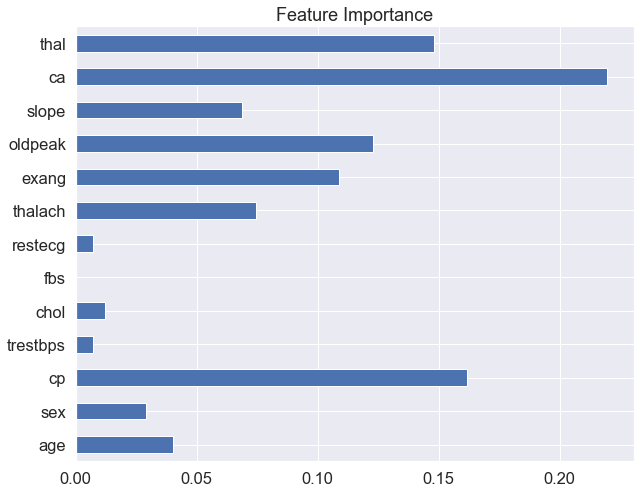

In [48]:
pd.DataFrame(feature_dict, index=[0]).T.plot(
    kind='barh', 
    title='Feature Importance', 
    legend=False,
    figsize=(10,8));